In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn import metrics
import numpy as np
import statistics as stat

In [2]:
pd.set_option('precision', 4)

wal = pd.read_csv('Walmart.csv')

In [3]:
wal.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1.6437e+06,0,42.31,2.572,211.0964,8.106
1,1,12-02-2010,1.6420e+06,1,38.51,2.548,211.2422,8.106
2,1,19-02-2010,1.6120e+06,0,39.93,2.514,211.2891,8.106
3,1,26-02-2010,1.4097e+06,0,46.63,2.561,211.3196,8.106
4,1,05-03-2010,1.5548e+06,0,46.50,2.625,211.3501,8.106


In [4]:
wal.shape

(6435, 8)

In [5]:
wal.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.0000,6.4350e+03,6435.0000,6435.0000,6435.0000,6435.0000,6435.0000
mean,23.0000,1.0470e+06,0.0699,60.6638,3.3586,171.5784,7.9992
std,12.9882,5.6437e+05,0.2550,18.4449,0.4590,39.3567,1.8759
min,1.0000,2.0999e+05,0.0000,-2.0600,2.4720,126.0640,3.8790
25%,12.0000,5.5335e+05,0.0000,47.4600,2.9330,131.7350,6.8910
50%,23.0000,9.6075e+05,0.0000,62.6700,3.4450,182.6165,7.8740
75%,34.0000,1.4202e+06,0.0000,74.9400,3.7350,212.7433,8.6220
max,45.0000,3.8187e+06,1.0000,100.1400,4.4680,227.2328,14.3130


In [6]:
wal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df1 = wal.copy()
df2 = wal.copy()

In [8]:
df2.pop('Weekly_Sales').values
df2.pop('Date').values

array(['05-02-2010', '12-02-2010', '19-02-2010', ..., '12-10-2012',
       '19-10-2012', '26-10-2012'], dtype=object)

In [9]:
df2

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,0,42.31,2.572,211.0964,8.106
1,1,1,38.51,2.548,211.2422,8.106
2,1,0,39.93,2.514,211.2891,8.106
3,1,0,46.63,2.561,211.3196,8.106
4,1,0,46.50,2.625,211.3501,8.106
...,...,...,...,...,...,...
6430,45,0,64.88,3.997,192.0136,8.684
6431,45,0,64.89,3.985,192.1704,8.667
6432,45,0,54.47,4.000,192.3273,8.667
6433,45,0,56.47,3.969,192.3309,8.667


In [10]:
def regression_line(x,y):
    
    m = (sum(x*y) - (sum(x)*sum(y)/len(x)))/(sum(x*x) - (sum(x)*sum(x)/len(x)))
    constant = stat.mean(y) - m*stat.mean(x)
    print(f'linear regression line: Slope = {m:.2f}, Constant = {constant:.2f}')
    
    plt.plot(x, y, 'o')
    reg_line = [(m * i) + constant for i in x]
    plt.plot(x, reg_line)
    plt.show()

linear regression line: Slope = -14570.95, Constant = 1382096.80


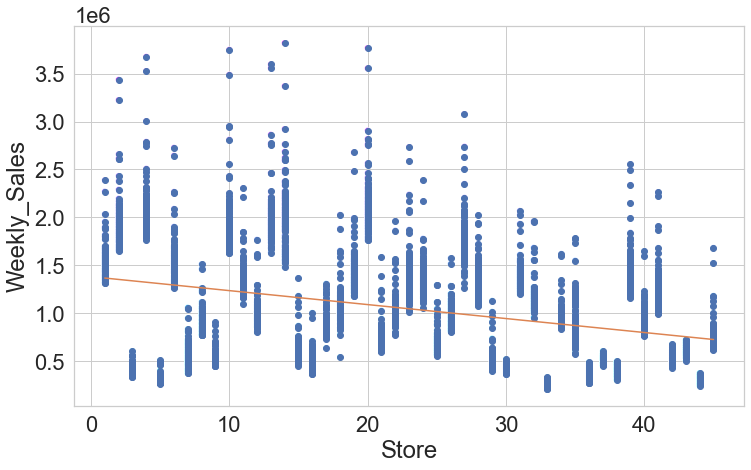

linear regression line: Slope = 81631.51, Constant = 1041256.38


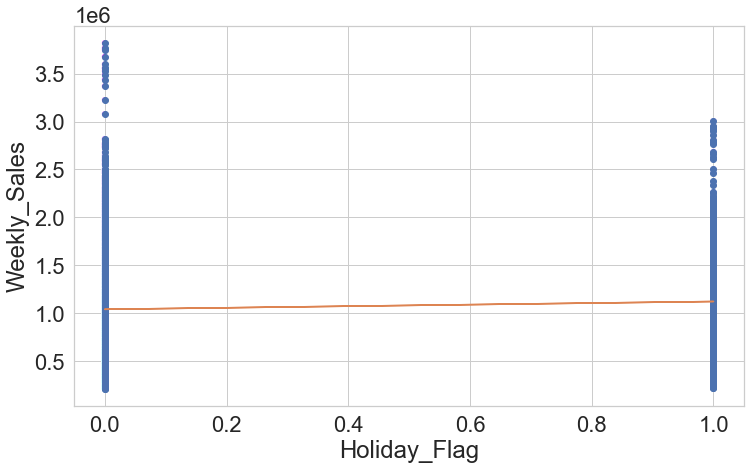

linear regression line: Slope = -1952.42, Constant = 1165406.01


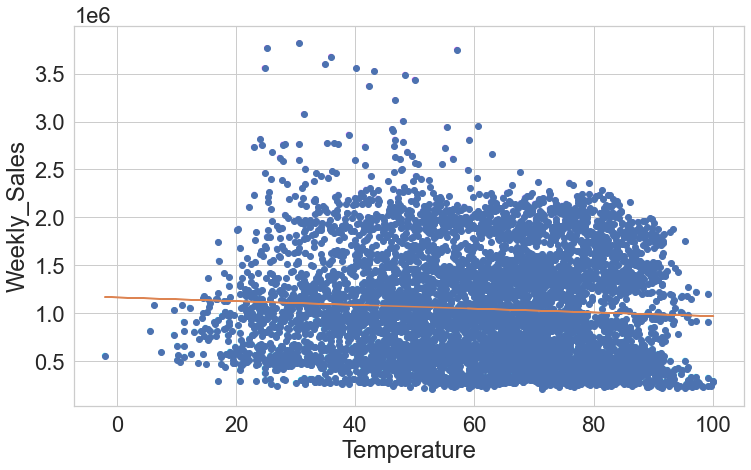

linear regression line: Slope = 11635.76, Constant = 1007884.92


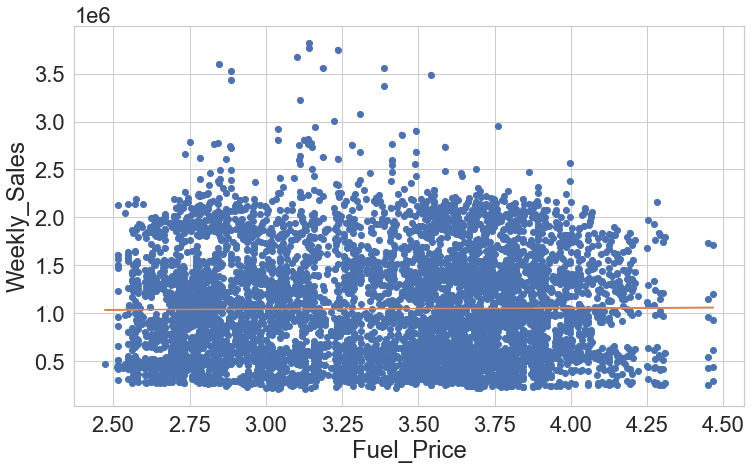

linear regression line: Slope = -1041.56, Constant = 1225673.72


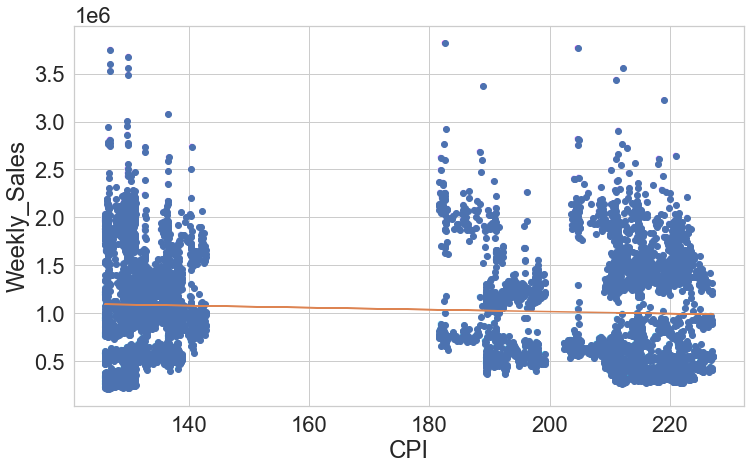

linear regression line: Slope = -31943.45, Constant = 1302485.40


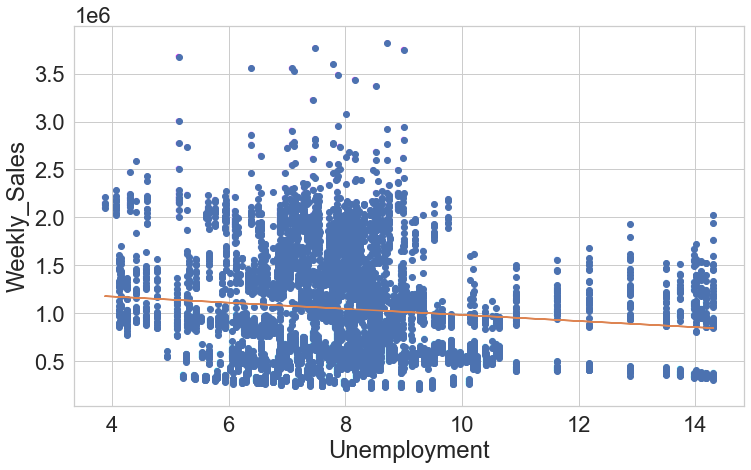

In [11]:
sns.set(font_scale=2)
sns.set_style('whitegrid')

for i in df2.columns:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=df1, x=i, y='Weekly_Sales',hue='Weekly_Sales',palette='cool', legend=False)
    regression_line(df2[i], df1['Weekly_Sales'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df2, df1['Weekly_Sales'], random_state=11)

print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

Shape of training set = (4826, 6)
Shape of testing  set = (1609, 6)


In [13]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

for i, name in enumerate(df2.columns):
    print(f'{name:}: {linear_regression.coef_[i]:20.20f}')

print()
print(f'y-intercept: {linear_regression.intercept_:23.20f}')

Store: -15159.89961919720553851221
Holiday_Flag: 71072.47945762868039309978
Temperature: -965.26360261701256604283
Fuel_Price: 12367.44948585749807534739
CPI: -2362.54551108040323015302
Unemployment: -22259.39214416267714113928

y-intercept: 1993045.83661157451570034027


In [14]:
import math
from sklearn import metrics

predicted = linear_regression.predict(X_test)
expected  = y_test

r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.1f}')
print(f'     correlation coefficient = {r:.1f}')

coefficient of determination = 0.1
     correlation coefficient = 0.4


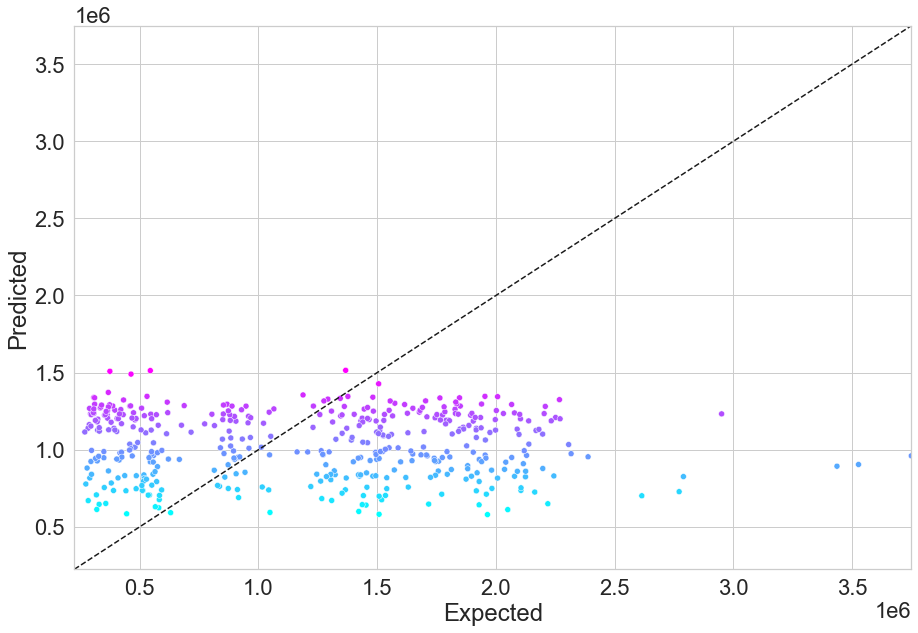

In [15]:
df = pd.DataFrame()

df['Expected']  = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(15, 10))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', 
                       legend=False)

start = min(expected.min(), predicted.min())
end   = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')